# Assignment 1 - Statistical Simulation

__Due date: April 12, 2018 by 10 pm__   
__Submision: Jupyter notebook file through GauchoSpace__   
__Late submission policy: Within 24 hours with 10% penalty. Not accepted after 24 hours__  
__Note: This is an individual assignment__

You will create a simulation. The goal is to empirically verify one statistics or probability concept or theorem. In doing so, you will use numpy arrays, sampling from various distributions, etc.

State your assumptions and choices you make in your simulation setting. Describe what you are simulating as if you were explaining the statistical result to someone with computing background, but basic probability and statistics.

If you are unclear what to do, pick a theorem, and show that it is correct empirically. Show all the claims is right in a probabilistic sense. Note that asymptotic results are theoretical results that you cannot unequivocally show in a simulation setting: i.e., $n\rightarrow\infty$.

Communicate your goal, process, and results clearly into a Jupyter notebook.

Guidelines:

- Make sure running your notebook takes no more than 2 minutes to complete
- Focus on explaining the concepts, coding legibly, and completeness
- We will run your code from top to bottom. Make sure it runs to completion without errors on https://jupyterhub.lsit.ucsb.edu

### Book resource

An excellent resource is a book titled [Simulation by Sheldon Ross](https://ucsb-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=01UCSB_ALMA51283278820003776&context=L&vid=UCSB&search_scope=default_scope&isFrbr=true&tab=default_tab&lang=en_US). Relevant materials are in Chapters 8 - 12.

### 234 students

The sky is the limit! You are free to simulate some probabilistic or statistical models what you find fun and exciting: Markov chains, goodness-of-fit-tests, etc.

### 134 students

Here are some ideas if there aren't other simulations you would like to pursue.

#### Confidence intervals

Simulate random observations from a selected distribution and compute the mean and variance estimates. Compare to the theoretical confidence results: i.e., the conclusion should be comparing the number of times the confidence bound is breached as compared to confidence $1-\alpha$.

#### Hypothesis testing

Select a null distribution. Then select an alternate truth that is different than the null. Sample from the alternate distribution, and, for a test statistic of your choosing, test various hypotheses. Compute the theoretical and empirical type I and II errors. Compare your results.

#### Likelihood ratio test

From WMS (120B textbook):

> __Theorem 10.2__: Let $Y_1, Y_2, \dots, Y_n$ have a joint likelihood function $L(\Theta)$. Let $r_0$ denote the number of free parameters that are specified by $H_0:\Theta\in\Omega_0$ and let $r$ denote the number of free parameters specified by the statement $\Theta\in\Omega_0$. Then, for large n, $-2\ln(\lambda)$ has approximately a $\chi^2$ distribution with $r_0-r$ degrees of freedom

where 

> $\lambda$ is defined by $$\lambda = \frac{L(\hat\Omega_0)}{L(\hat\Omega)} = \frac{\max_{\Theta\in{\Omega_0}}L(\Theta)}{\max_{\Theta\in{\Omega}}L(\Theta)}$$

## Metropolis Hastings

**Based off Simulation by Sheldon Ross Chapter 12.2 Metropolis Hastings**

**Suppose that X is a mixture of normal random variables with the density function, defined up to proportionality
$$f(x)∝e^{{−(x−1)}^2/2} +e^{{−(x+1)}^2/2};  0<x<10.$$
Use a Metropolis-Hastings algorithm to estimate E[X] and Var(X ). Compare with theoretical values**

Find Theoretical E[X] and Var[X]

Find $\alpha$ first:
$$\alpha = {\int_{0}^{10} e^{{−(x−1)}^2/2} +e^{{−(x+1)}^2/2} dx}^{-1}$$
$$\alpha = 0.3989422804$$

$$E[X] = \int_{0}^{\infty}xf(x)dx$$
$$E[X] = \int_{0}^{10} x \cdot 3989422804(e^{{−(x−1)}^2/2} +e^{{−(x+1)}^2/2}) dx$$
$$E[X] = 1.166630941171182$$


$$E[X^2] = \int_{0}^{10} x^2 \cdot 3989422804(e^{{−(x−1)}^2/2} +e^{{−(x+1)}^2/2}) dx$$
$$E[X^2] = 1.999999999992816$$
$$E[X]^2 = 1.166630941171182^2 = 1.3610277529$$

$$Var[X] = E[X^2] - E[X]^2$$
$$Var[X] = 1.999999999992816 - 1.3610277529$$
$$Var[X] = 0.63897224709$$

Theoretical Values:
$$E[X] = 1.166630941171182$$
            
$$Var[X] = 0.63897224709$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
trials = 10000
def f(x):
    if(x>10 or x < 0):
        return 0
    else:
        return np.exp(-(x-1)**2/2)+np.exp(-(x+1)**2/2)

s = 2
l = []

def mh(s):
    if(s > 0 and s < 10):
        y = np.random.uniform(s-1,s+1)
        a = f(y)/f(s)
        if(a >= 1):
            return y
        else:
            u = np.random.uniform(0,1)
            if(u <= a):
                return y
            else:
                return s
            

for i in range(trials):
    s = mh(s)
    l.append(s)
    
print("The estimated expected value of X is:\n{}, which is very similar to the theoretical value of 1.166630941171182.".format(np.mean(l)))
print("The estimated variance of X is:\n{}, which is very similar to the theoretical value of 0.63897224709".format(np.var(l)))

The estimated expected value of X is:
1.1773381493288466, which is very similar to the theoretical value of 1.166630941171182.
The estimated variance of X is:
0.6437055674342484, which is very similar to the theoretical value of 0.63897224709


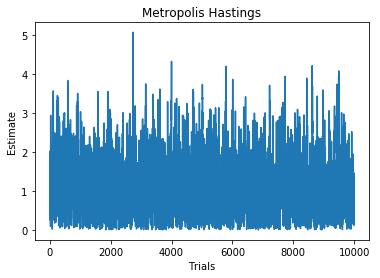

In [12]:
plt.plot(l)
plt.xlabel("Trials")
plt.ylabel("Estimate")
plt.title("Metropolis Hastings")
plt.show()